In [1]:
import sys
sys.path = ["../../.."] + sys.path # 切换到项目目录下

import velovgi

Global seed set to 0
/home/huang/.conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/huang/.conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
adata = velovgi.tl.read_adata("./data/adata/") # 后续的绘图都是在这个处理后的adata上做的
cluster_key = "celltype"
batch_key="stage"
adata

load ./data/adata//adata.h5ad
load ./data/adata//sample_recover.pkl


AnnData object with n_obs × n_vars = 9815 × 2000
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'is_sampled', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_colors', 'neighbors', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'sample_recover'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'Ms', 'Mu', 'fit_t', 'spliced', 'unspliced', 'velocity', 'velocity_u'
    obsp: 'connectivities', 'distances'

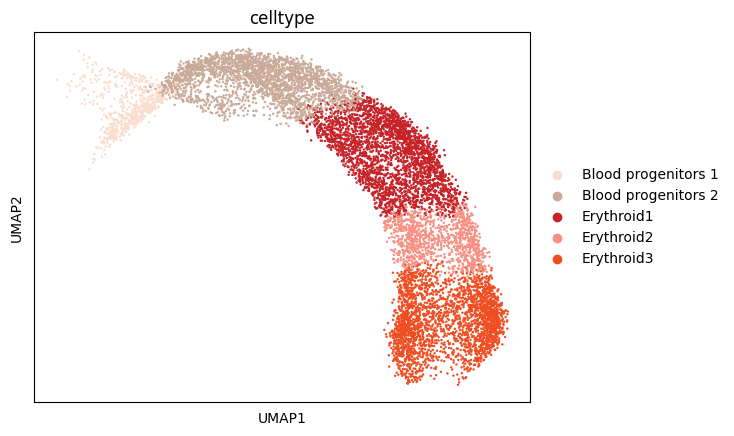

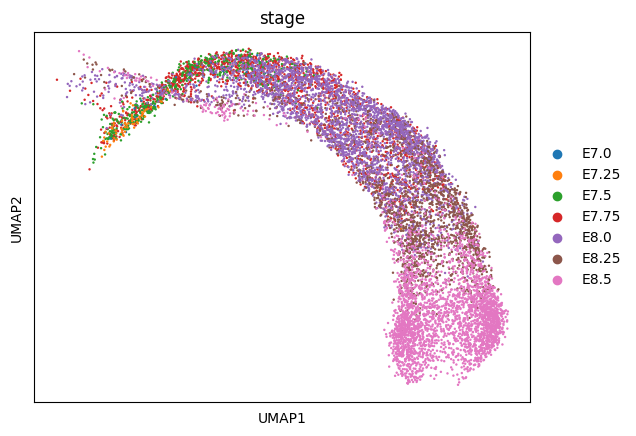

In [8]:
import scanpy as sc

sc.pl.umap(adata, color=cluster_key)
sc.pl.umap(adata, color=batch_key)

<AxesSubplot: title={'center': 'celltype'}, xlabel='X_umap_transformed_batch1', ylabel='X_umap_transformed_batch2'>

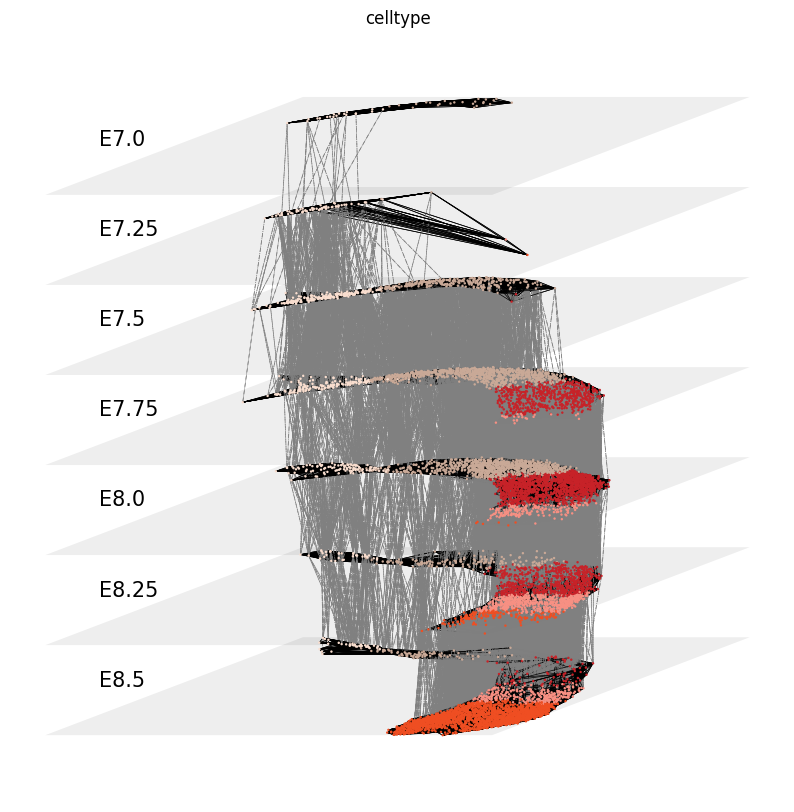

In [10]:
import numpy as np
import matplotlib.pyplot as plt

transform_matrix_params = dict(p=0.5, q=2 , theta=np.pi/20) # 转换矩阵参数
sep = 20 # 批次间隔
# embedding_plot_params = dict() # 散点绘图函数
embedding_plot_params = dict(legend_loc=None, frameon=False) # 散点绘图参数

figsize=(10,10)
fig, ax = plt.subplots(figsize=figsize) # 控制画布大小
velovgi.pl.draw_batch_layer_embedding(adata, cluster_key=cluster_key, batch_key=batch_key, transform_matrix_params=transform_matrix_params, sep=sep, embedding_plot_params=embedding_plot_params, ax=ax, show_edge=True)